## Naive Bayes

In [42]:
import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd

In [43]:
salary_train =pd.read_csv('SalaryData_Train.csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [44]:
salary_test=pd.read_csv('SalaryData_Test.csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Training data

In [45]:
salary_train.shape

(30161, 14)

In [46]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


No null values in dataset

the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.

In [47]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [48]:
salary_train[salary_train.duplicated()].shape

(3258, 14)

In [49]:
salary_train.drop_duplicates()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [50]:
categorical = [var for var in salary_train.columns if salary_train[var].dtype=='O']
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [51]:
numrical = [var for var in salary_train.columns if salary_train[var].dtype!='O']
numrical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

## Testing data

In [52]:
salary_test.shape

(15060, 14)

In [53]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [54]:
salary_test[salary_test.duplicated()].shape

(930, 14)

In [55]:
salary_test.drop_duplicates()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Data visualization

<AxesSubplot:xlabel='Salary', ylabel='count'>

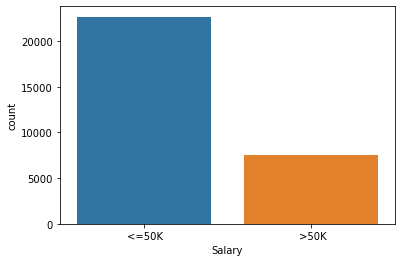

In [56]:
sns.countplot(x='Salary',data= salary_train)

In traing data <=50K salary has more count

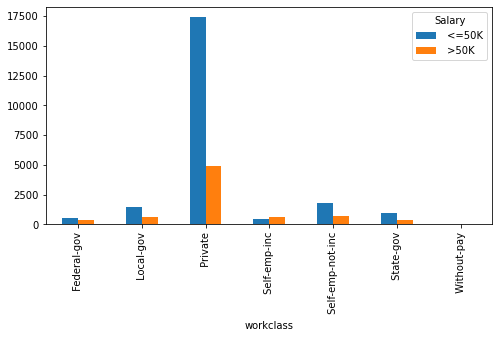

In [57]:
# bar plot between 2 different categories 
pd.crosstab(salary_train.workclass,salary_train.Salary).plot(kind="bar",figsize=(8,4));  

here in workclass have 7 differnt categories and private category has high number of <=50k

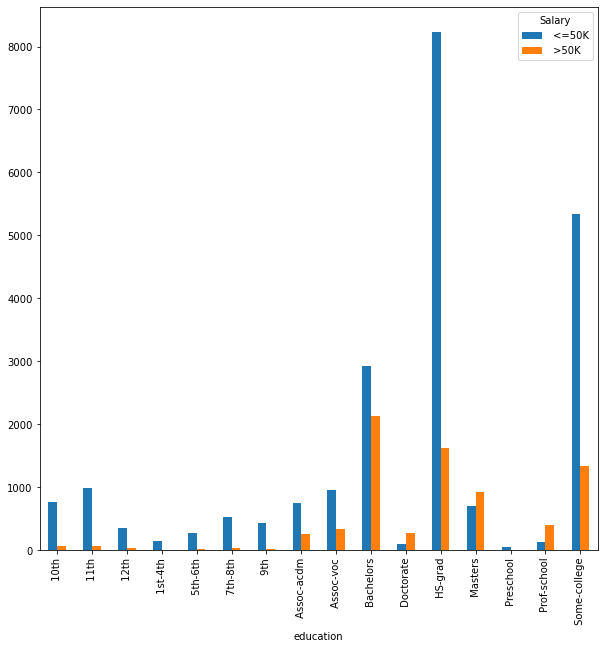

In [58]:
# bar plot between 2 different categories 
pd.crosstab(salary_train.education,salary_train.Salary).plot(kind="bar",figsize=(10,10));  

campare to salary Bachleros,HS-grad,Some college has high count in more than equal to 50K

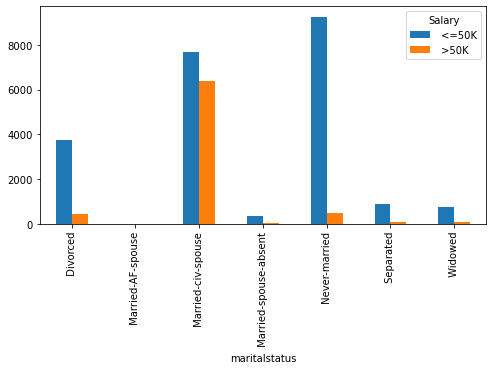

In [59]:
# bar plot between 2 different categories 
pd.crosstab(salary_train.maritalstatus,salary_train.Salary).plot(kind="bar",figsize=(8,4));  

Never-married has high count in <=50K

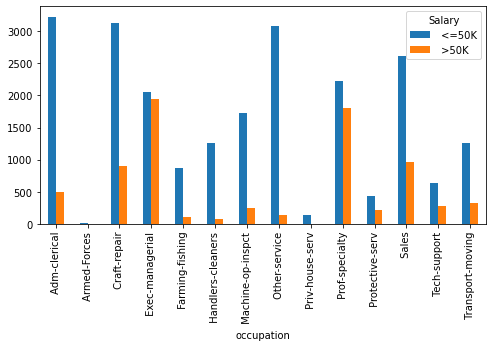

In [60]:
pd.crosstab(salary_train.occupation,salary_train.Salary).plot(kind="bar",figsize=(8,4));  

Most of the occupation salary is more than and equal to 50K

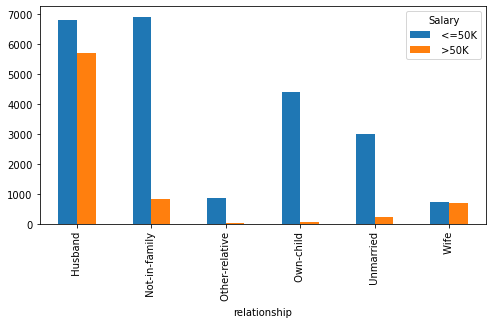

In [61]:
pd.crosstab(salary_train.relationship,salary_train.Salary).plot(kind="bar",figsize=(8,4));  

Most of the relationship salary is more than and equal to 50K

<AxesSubplot:xlabel='Salary', ylabel='count'>

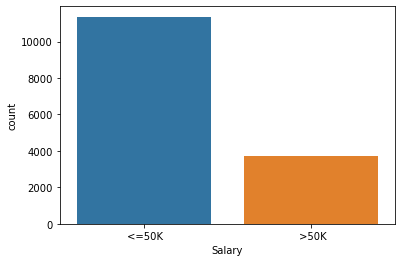

In [62]:
sns.countplot(x='Salary',data= salary_test)

Teat data has high count of <=50K

In [63]:
salary_train['sex'].value_counts()

 Male      20380
 Female     9781
Name: sex, dtype: int64

Male has high count in training data

In [64]:
salary_test['sex'].value_counts()

 Male      10147
 Female     4913
Name: sex, dtype: int64

Male has high count in testing data

In [65]:
salary_train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [66]:
salary_test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [67]:
import warnings
warnings.filterwarnings("ignore")

## Encoding and Scaling data

In [68]:
# dividing data into train data manually
train_f =salary_train.iloc[:,0:13]
train_t = salary_train[['Salary']]

In [69]:
#dividing data into testing data namually
test_f=salary_test.iloc[:,0:13]
test_t=salary_test[['Salary']]

In [70]:
#Encoding data with Label encoding
from sklearn.preprocessing import LabelEncoder
columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
# Initialize label encoder object
label_encoder = LabelEncoder()
for i in columns:
    train_f[i] =label_encoder.fit_transform(train_f[[i]])
    test_f[i] =label_encoder.fit_transform(test_f[i])
    

# Transform to labels for training and test 'Salary'
train_t['Salary'] = label_encoder.fit_transform(train_t['Salary'])
test_t['Salary'] = label_encoder.fit_transform(test_t['Salary'])



In [71]:
train_f

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [72]:
test_f

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [73]:
colnames = train_f.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native'],
      dtype='object')

In [74]:
##Coverting dataframe into array
x_train = train_f[colnames[0:13]].values
y_train = train_t['Salary'].values
x_test = test_f[colnames[0:13]].values
y_test = test_t['Salary'].values

In [75]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [76]:
x_train

array([[39,  5,  9, ...,  0, 40, 37],
       [50,  4,  9, ...,  0, 13, 37],
       [38,  2, 11, ...,  0, 40, 37],
       ...,
       [58,  2, 11, ...,  0, 40, 37],
       [22,  2, 11, ...,  0, 20, 37],
       [52,  3, 11, ...,  0, 40, 37]], dtype=int64)

In [77]:
y_test

array([0, 0, 1, ..., 0, 0, 1])

### Model Bulding

In [78]:
from sklearn.naive_bayes import MultinomialNB as mb
from sklearn.naive_bayes import GaussianNB as gb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Gaussian Naive Bayes
Gaussian Naive Bayes is a classification technique used in Machine Learning (ML) based on the probabilistic 
approach and Gaussian distribution.

In [79]:
classifier_GB = gb()

In [80]:
train_pred=classifier_GB.fit(x_train,y_train).predict(x_train)
test_pred=classifier_GB.fit(x_train,y_train).predict(x_test)

In [81]:
accuracy_train_g = np.mean(train_pred==y_train)
accuracy_train_g

0.7953317197705646

accuracy is 79%

In [183]:
accuracy_test_g = np.mean(test_pred==y_test)
accuracy_test_g

0.7946879150066402

In [184]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred)
confusion_matrix

array([[10759,   601],
       [ 2491,  1209]], dtype=int64)

In [185]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



### Multinomial Naive Bayes
MultinomialNB implements the naive Bayes algorithm for multinomially distributed data,
and is one of the two classic naive Bayes variants used in text classification 

In [187]:
classifier_mb = mb()

In [188]:
train_pred_m=classifier_mb.fit(x_train,y_train).predict(x_train)
test_pred_m=classifier_mb.fit(x_train,y_train).predict(x_test)

In [189]:
accuracy_train_m = np.mean(train_pred_m==y_train)
accuracy_train_m

0.7729186698053778

In [190]:
accuracy_test_m= np.mean(test_pred_m==y_test)
accuracy_test_m

0.7749667994687915

Gaussian Naive Bayes gives better accuracy with better f1 score